In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
train, test = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [8]:
X_train, y_train = train
X_test, y_test = test
df= pd.DataFrame(X_test)
print(df.head())

         0    1      2    3      4      5      6       7     8      9     10  \
0  18.08460  0.0  18.10  0.0  0.679  6.434  100.0  1.8347  24.0  666.0  20.2   
1   0.12329  0.0  10.01  0.0  0.547  5.913   92.9  2.3534   6.0  432.0  17.8   
2   0.05497  0.0   5.19  0.0  0.515  5.985   45.4  4.8122   5.0  224.0  20.2   
3   1.27346  0.0  19.58  1.0  0.605  6.250   92.6  1.7984   5.0  403.0  14.7   
4   0.07151  0.0   4.49  0.0  0.449  6.121   56.8  3.7476   3.0  247.0  18.5   

       11     12  
0   27.25  29.05  
1  394.95  16.21  
2  396.90   9.74  
3  338.92   5.50  
4  395.15   8.44  


In [4]:
# normalize X_train and X_test
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

In [5]:
print(X_train.shape, y_train.shape)

(404, 13) (404,)


### Using Gradient Descent

In [8]:
class GradienDescent:
    def __init__(self, X):
        self.theta = np.zeros(X.shape[1])

    def __call__(self, X):
        return np.dot(X, self.theta)
    
    def cost(self, X, y):
        m = X.shape[0]
        h = self(X)
        J = (1 / (2 * m)) * np.dot((h - y).T, (h - y))
        return J

    def gradient(self, X, y):
        m = X.shape[0]
        h = self(X)
        error = h - y
        return (1 / m) * np.dot(X.T, error)

    def gradient_descent(self, X, y, num_iterations=1000, lr=0.01):
        loss_list = []
        for epoch in range(1, num_iterations+1):
            m = X.shape[0]
            h = self(X)
            loss = self.cost(X, y)
            loss_list.append(loss)
            print(f"Epoch={epoch} | MSE={loss}")
            gradient = self.gradient(X, y)
            self.theta = self.theta - lr * gradient

        return self.theta, loss_list  

In [9]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train] # add bias term to X_train
X_test = np.c_[np.ones(X_test.shape[0]), X_test] # add bias term to X_test

In [10]:
model2 = GradienDescent(X_train)
theta, loss_list = model2.gradient_descent(X_train, y_train, num_iterations=1000, lr=0.01)

Epoch=1 | MSE=293.08024752475245
Epoch=2 | MSE=285.92008189974774
Epoch=3 | MSE=279.0880033077387
Epoch=4 | MSE=272.55536983955693
Epoch=5 | MSE=266.2967516742513
Epoch=6 | MSE=260.2895512321755
Epoch=7 | MSE=254.51366866984105
Epoch=8 | MSE=248.95120729548017
Epoch=9 | MSE=243.58621413257936
Epoch=10 | MSE=238.404451429425
Epoch=11 | MSE=233.3931954152214
Epoch=12 | MSE=228.54105904575403
Epoch=13 | MSE=223.83783587107843
Epoch=14 | MSE=219.27436250063462
Epoch=15 | MSE=214.84239744309428
Epoch=16 | MSE=210.53451436405092
Epoch=17 | MSE=206.34400803867177
Epoch=18 | MSE=202.26481148245946
Epoch=19 | MSE=198.29142292465178
Epoch=20 | MSE=194.4188414484834
Epoch=21 | MSE=190.64251026312562
Epoch=22 | MSE=186.95826669589977
Epoch=23 | MSE=183.3622981023349
Epoch=24 | MSE=179.8511029875863
Epoch=25 | MSE=176.42145671719553
Epoch=26 | MSE=173.07038126954504
Epoch=27 | MSE=169.7951185478293
Epoch=28 | MSE=166.5931068270105
Epoch=29 | MSE=163.46195996197395
Epoch=30 | MSE=160.3994490277826
E

In [11]:
y_pred = model2(X_test)
loss = tf.losses.mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % loss.numpy())
loss2 = tf.losses.mean_absolute_error(y_test, y_pred)
print("Mean absolute error: %.2f" % loss2.numpy())

Mean squared error: 20.37
Mean absolute error: 3.29


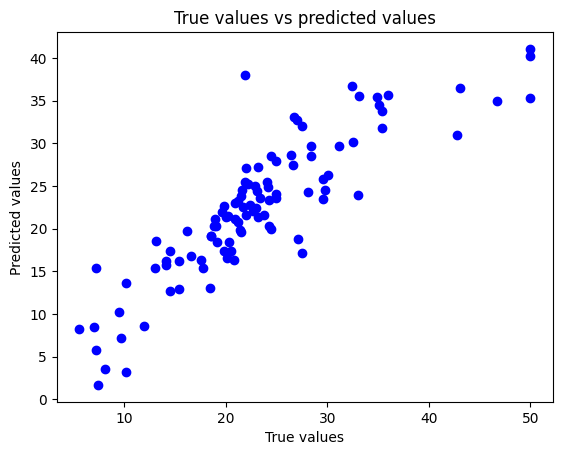

In [14]:
plt.scatter(y_test, y_pred, c = 'blue')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True values vs predicted values")
plt.show()

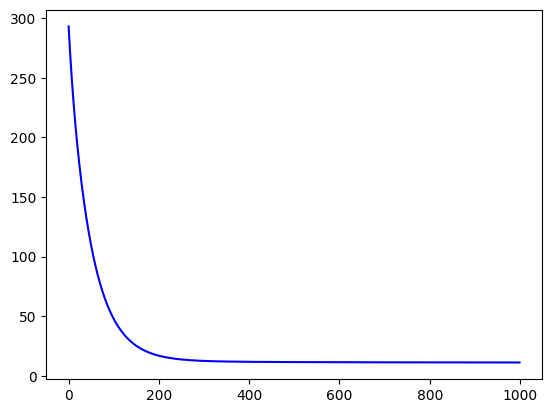

In [13]:
# plot the loss curve
plt.plot(loss_list, c='blue')